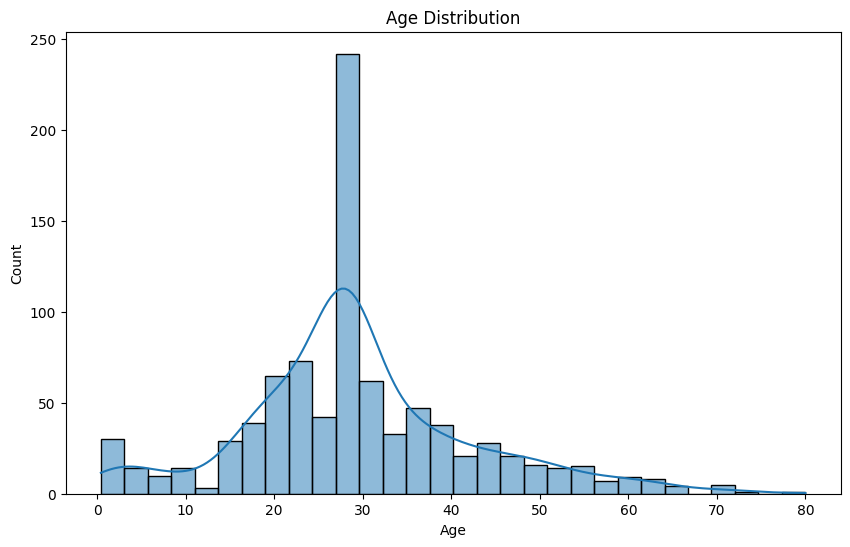

In [9]:
import pandas as pd
titanic = pd.read_csv('/content/train.csv')
titanic.head()
titanic.isnull().sum()
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
titanic.describe()
survival_by_sex = titanic.groupby('Sex')['Survived'].mean()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


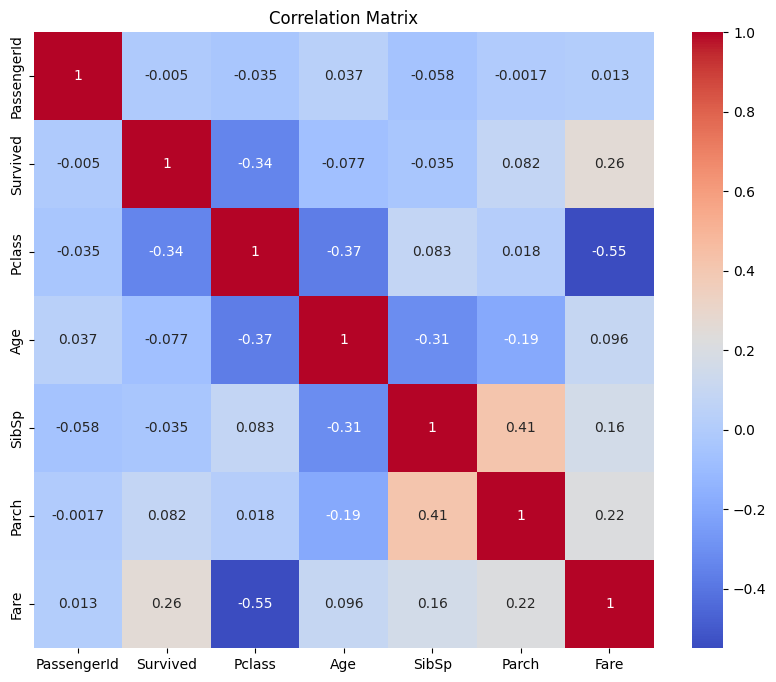

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic = pd.read_csv('/content/train.csv')
print(titanic.dtypes)
numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) == 0:
    print("No numeric columns found in the DataFrame for correlation analysis.")
else:
    corr_matrix = titanic[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
